In [1]:
!pip install control


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 10.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Plant transfer function G(s) = 1 / (s^2 + 3s + 2)
G = ctrl.tf([1], [1, 3, 2])

# PID Controller: C(s) = Kp + Ki/s + Kd*s
Kp, Ki, Kd = 2, 1, 0.5
C = ctrl.tf([Kd, Kp, Ki], [1, 0])

# Closed-loop system with negative feedback
T = ctrl.feedback(C * G, 1)

# Step response
t, y = ctrl.step_response(T)



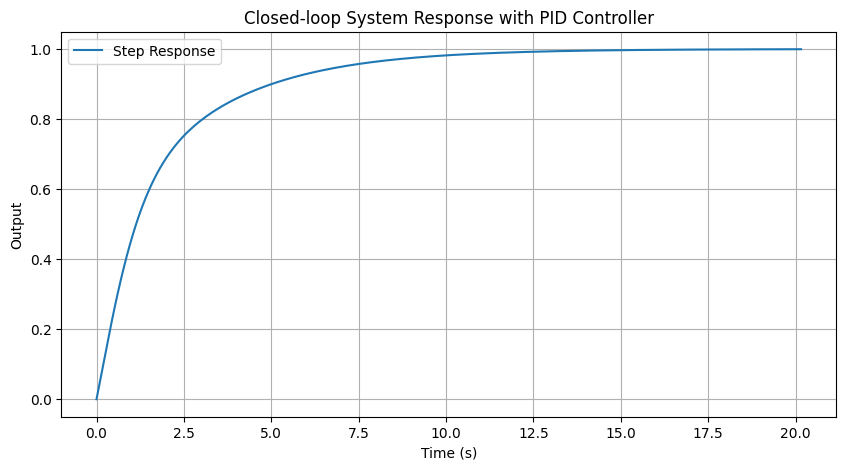

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(t, y, label='Step Response')
plt.title('Closed-loop System Response with PID Controller')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid(True)
plt.legend()
plt.show()


In [4]:
from ipywidgets import interact, FloatSlider

def simulate_pid(Kp=2.0, Ki=1.0, Kd=0.5):
    C = ctrl.tf([Kd, Kp, Ki], [1, 0])
    T = ctrl.feedback(C * G, 1)
    t, y = ctrl.step_response(T)
    plt.figure(figsize=(8, 4))
    plt.plot(t, y)
    plt.title(f"PID Response (Kp={Kp}, Ki={Ki}, Kd={Kd})")
    plt.xlabel('Time'); plt.ylabel('Output')
    plt.grid(True)
    plt.show()

interact(simulate_pid,
         Kp=FloatSlider(value=2, min=0, max=10, step=0.1),
         Ki=FloatSlider(value=1, min=0, max=10, step=0.1),
         Kd=FloatSlider(value=0.5, min=0, max=5, step=0.1));


interactive(children=(FloatSlider(value=2.0, description='Kp', max=10.0), FloatSlider(value=1.0, description='…